# Regularization to overcome overfitting

In [42]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_overfit import overfit_example, output
from lab_utils_common import sigmoid
np.set_printoptions(precision = 8)

In [43]:
#Adding Regularization
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    m = X.shape[0]
    n = len(w)
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost /= (2*m)
    
    reg_cost = 0
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost = (lambda_/(2*m))*reg_cost
    
    total_cost = cost + reg_cost
    
    return total_cost


In [44]:
#executing the function
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1) - 0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"Regularized cost : {cost_tmp}")

Regularized cost : 0.07917239320214275


# gradient descent with regularization
gradient function for regularized linear expression

In [45]:
def compute_gradient_linear_reg(X,y,w,b,lambda_):
    m,n = X.shape
    #m is the number of examples and
    # n is the number of features
    
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(X[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*X[i,j]
        dj_db = dj_db + err
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m)*w[j]
        
    return dj_db, dj_dw

In [46]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
#p = X_tmp.shape[1]
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp = compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db : {dj_db_tmp}")
print(f"dj_dw : \n {dj_dw_tmp.tolist()}")

dj_db : 0.6648774569425726
dj_dw : 
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


# Gradient function for regularized Logistic Expression
creating a method compute_gradient_logistic regularization

In [47]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i = (f_wb_i - y[i])
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i*X[i,j]
            
        dj_db = dj_db + err_i
        
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m)*w[j]
        
    return dj_db, dj_dw

Testing the function for the regularized logistic regression

In [48]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db : {dj_db_tmp}")
print(f"dj_dw :\n {dj_dw_tmp.tolist()}")

dj_db : 0.341798994972791
dj_dw :
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


# Rerun Overfitting example with Regularization
Expected result is that there shouldn't be any overfitting

Output(outputs=({'output_type': 'error', 'ename': 'TypeError', 'evalue': "Ridge.__init__() got an unexpected k…

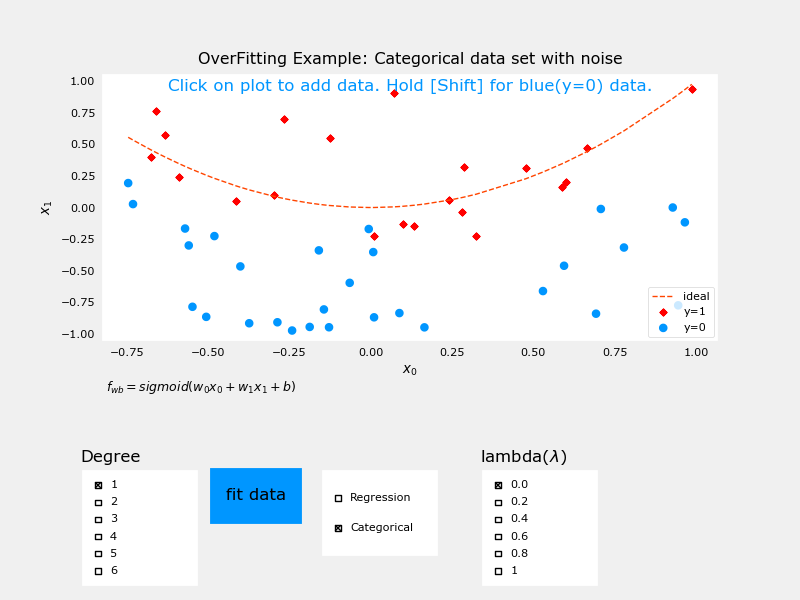

In [49]:
plt.close('all')
display(output)
overfit = overfit_example(True)